Experiment 1

In [1]:
# Analytical Tools
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# General Utilities
import math
import json
import pprint
import itertools
import importlib

# Some settings
from IPython.display import Markdown, display
log = pprint.pprint
space = lambda: print()
printmd = lambda text: display(Markdown(text))
%matplotlib inline

Text and visual:  Ttest_indResult(statistic=-2.88983791043761, pvalue=0.003938103510905851)
Text and AI:  Ttest_indResult(statistic=-4.984411516779442, pvalue=7.330155558331295e-07)
Visual and AI:  Ttest_indResult(statistic=-2.0995705257596815, pvalue=0.03602239239683098)


<ipython-input-3-88dbe7ec7d52>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=df1, x='condition', y = 'support',  width=0.4, order=order_list, linecolor='k', linewidth=2, palette='pastel', notch = True, zorder=1)


condition   support                      sign
                 mean       std count      mean
0    better  6.396728  3.049803   489  0.484663
1      text  5.436759  3.024807   506  0.347826
2    visual  5.989817  3.017280   491  0.443992

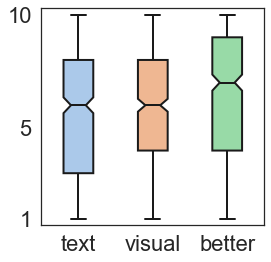

In [3]:
with open('exp1.json') as json_file:
    data = json.load(json_file)
    
# Analysis

cols = ['condition', 'support', 'sign']
lst = []
rts = []

c=0

for i in range(len(data)):

    support = data[i]['data'][9]['responses'][7]
    condition = data[i]['data'][9]['condition']
    attention = data[i]['data'][9]['responses'][16]
    
    #willing to sign the petition or not
    if data[i]['data'][10]['responses'][7] == 'Y':
        sign = 1
    else:
        sign = 0
    
    rt = int(data[i]['data'][2]['rt'])/1000
    rts.append(rt)
    if int(attention) == 4:    #only append if they passed the attention check
        if int(data[i]['data'][2]['rt'])/1000 > 4: #only append if they read the bill for greater than X secs
            lst.append([condition, support, sign])
        else:
            c =c+1
            
            #print(condition, i, support)
    else:
        c =c+1
        #print(condition, i)
        
df1 = pd.DataFrame(lst, columns=cols)
df1['support'] = df1['support'].astype('int')+1
df1['sign'] = df1['sign'].astype('int')
results = df1.groupby(['condition'], as_index=False).agg(
                     {'support':['mean','std', 'count'],'sign':['mean'],})

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
sns.set(font_scale=2)
sns.set_style('white')
order_list = ['text', 'visual', 'better']

g = sns.boxplot(data=df1, x='condition', y = 'support',  width=0.4, order=order_list, linecolor='k', linewidth=2, palette='pastel', notch = True, zorder=1)


g.set(yticks=[1,5,10])
g.set(xlabel='')
g.set(ylabel='')
g.set_ylim([0.7,10.3])


#plt.savefig('r1.png', format='png', dpi=1200, bbox_inches='tight')



from scipy.stats import ttest_ind
cat1 = df1[df1['condition']=='text']['support']
cat2 = df1[df1['condition']=='visual']['support']
cat3 = df1[df1['condition']=='better']['support']

print('Text and visual: ', ttest_ind(cat1, cat2))
print('Text and AI: ', ttest_ind(cat1, cat3))
print('Visual and AI: ', ttest_ind(cat2, cat3))

results
#print(len(data))

Political affiliation analysis

Republican
Text and visual:  Ttest_indResult(statistic=0.5783028561366114, pvalue=0.563816080379077)
Text and better:  Ttest_indResult(statistic=-2.456234966021165, pvalue=0.014973163814251258)
Visual and better:  Ttest_indResult(statistic=-2.781609273010739, pvalue=0.00608979542927167)
Democrat
Text and visual:  Ttest_indResult(statistic=-1.2453679202988028, pvalue=0.21356506695437635)
Text and better:  Ttest_indResult(statistic=-2.535225627760045, pvalue=0.011540524879011662)
Visual and better:  Ttest_indResult(statistic=-1.3514256678871253, pvalue=0.17715128813870154)
Independent
Text and visual:  Ttest_indResult(statistic=-2.72342541169205, pvalue=0.006859604706149427)
Text and better:  Ttest_indResult(statistic=-3.5135290297374637, pvalue=0.0005125259519686119)
Visual and better:  Ttest_indResult(statistic=-0.7722497053191065, pvalue=0.440591121127201)


<ipython-input-12-3173d94b1d96>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.stripplot(data=r, x='condition', y = 'support', palette='Reds', size=4, marker="o", edgecolor="gray", alpha=.2, jitter = 0.35, order=order_list)
<ipython-input-12-3173d94b1d96>:63: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  g= sns.stripplot(data=r, x='condition', y = 'support', palette='Reds', size=4, marker="o", edgecolor="gray", alpha=.2, jitter = 0.35, order=order_list)
<ipython-input-12-3173d94b1d96>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=r, x='condition', y = 'support', capsize = 0.2, ci = 95, color='w', edgecolor='k', lw=3,order=order_list, ax=g, zorder=2)


,party,support,sign
,,count,mean
0,D,768,0.548177
1,I,437,0.345538
2,NA,24,0.083333
3,R,257,0.221790


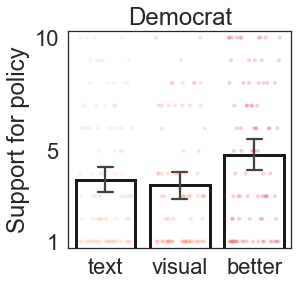

In [12]:
with open('exp1.json') as json_file:
    data = json.load(json_file)
    
# Analysis

cols = ['condition', 'support', 'sign', 'party']
lst = []
rts = []

for i in range(len(data)):

    support = data[i]['data'][9]['responses'][7]
    condition = data[i]['data'][9]['condition']
    attention = data[i]['data'][9]['responses'][16]
    
    #willing to sign the petition or not
    if data[i]['data'][10]['responses'][7] == 'Y':
        sign = 1
    else:
        sign = 0
    
    #politics
    if 'Republican' in data[i]['data'][11]['responses']:
        party = 'R'
    elif 'Democrat' in data[i]['data'][11]['responses']:
        party = 'D'
    elif 'Independent' in data[i]['data'][11]['responses']:
        party = 'I'
    else:
        party = 'NA'
        
            
    rt = int(data[i]['data'][2]['rt'])/1000
    rts.append(rt)
    if int(attention) == 4:    #only append if they passed the attention check
        if int(data[i]['data'][2]['rt'])/1000 > 4: #only append if they read the bill for greater than X secs
            lst.append([condition, support, sign, party])
        else:
            p=1
            #print(condition, i, support)
    else:
        p =1
        #print(condition, i)
        
df1 = pd.DataFrame(lst, columns=cols)
df1['support'] = df1['support'].astype('int')+1
df1['sign'] = df1['sign'].astype('int')
results = df1.groupby(['condition','party'], as_index=False).agg(
                     {'support':['mean','std', 'count'],'sign':['mean'],})

results2 = df1.groupby(['party'], as_index=False).agg(
                     {'support':[ 'count'],'sign':['mean'],})



#plot the different party results!

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)

r = df1.loc[df1['party'] == 'R']

g = sns.boxplot(data=r, x='condition', y = 'support', width=0.4, order=order_list, linecolor='k', linewidth=2, palette='Reds', notch = True)

g.set(xlabel='')
g.set(ylabel='')
g.set(title='')
g.set(yticks=[1,5,10])
g.set_ylim([0.7,10.3])

from scipy.stats import ttest_ind
cat1 = r[r['condition']=='text']['support']
cat2 = r[r['condition']=='visual']['support']
cat3 = r[r['condition']=='better']['support']

print('Republican')
print('Text and visual: ', ttest_ind(cat1, cat2))
print('Text and AI: ', ttest_ind(cat1, cat3))
print('Visual and AI: ', ttest_ind(cat2, cat3))

d = df1.loc[df1['party'] == 'D']
cat1 = d[d['condition']=='text']['support']
cat2 = d[d['condition']=='visual']['support']
cat3 = d[d['condition']=='better']['support']

#g = sns.boxplot(data=d, x='condition', y = 'support', width=0.4, order=order_list, linecolor='k', linewidth=2, palette='Blues', notch = True)

g.set(xlabel='')
g.set(ylabel='Support for policy')
g.set(yticks=[1,5,10])
g.set_ylim([0.7,10.3])
g.set(title='Democrat')


print('Democrat')
print('Text and visual: ', ttest_ind(cat1, cat2))
print('Text and AI: ', ttest_ind(cat1, cat3))
print('Visual and AI: ', ttest_ind(cat2, cat3))

I = df1.loc[df1['party'] == 'I']
cat1 = I[I['condition']=='text']['support']
cat2 = I[I['condition']=='visual']['support']
cat3 = I[I['condition']=='better']['support']

#g = sns.boxplot(data=I, x='condition', y = 'support', width=0.4, order=order_list, linecolor='k', linewidth=2, palette='Greens', notch = True)

g.set(xlabel='')
g.set(ylabel='Support for policy')
g.set(yticks=[1,5,10])
g.set_ylim([0.7,10.3])
#g.set(title='Independent')


print('Independent')
print('Text and visual: ', ttest_ind(cat1, cat2))
print('Text and AI: ', ttest_ind(cat1, cat3))
print('Visual and AI: ', ttest_ind(cat2, cat3))

results2
#plt.savefig('r2.png', format='png', dpi=1200, bbox_inches='tight')
